In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
import re
import os
%matplotlib inline
from mgwr.sel_bw import Sel_BW
from mgwr.gwr import GWR, MGWR
from pandas.core.frame import DataFrame
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

## Read files

In [2]:
path = os.path.join('MSOA')
vac_fn = 'vaccination.csv'
data = pd.read_csv(os.path.join(path,vac_fn), low_memory=False)

In [3]:
case_fn = 'case.csv'
case = pd.read_csv(os.path.join(path,case_fn), low_memory=False)

In [4]:
data = pd.merge(data, case, how='inner',  left_on='LTLA name', right_on='LTLA name', sort=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6372 entries, 0 to 6371
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Region code  6372 non-null   object 
 1   Region name  6372 non-null   object 
 2   LTLA code    6372 non-null   object 
 3   LTLA name    6372 non-null   object 
 4   MSOA code    6372 non-null   object 
 5   MSOA name    6372 non-null   object 
 6   3rdvac       6372 non-null   int64  
 7   Case number  6372 non-null   int64  
 8   Case rate    6372 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 497.8+ KB


In [5]:
death_fn = 'death.csv'
death = pd.read_csv(os.path.join(path,death_fn), low_memory=False)
data = pd.merge(data, death, how='inner',  left_on='LTLA name', right_on='LTLA name', sort=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6372 entries, 0 to 6371
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Region code  6372 non-null   object 
 1   Region name  6372 non-null   object 
 2   LTLA code    6372 non-null   object 
 3   LTLA name    6372 non-null   object 
 4   MSOA code    6372 non-null   object 
 5   MSOA name    6372 non-null   object 
 6   3rdvac       6372 non-null   int64  
 7   Case number  6372 non-null   int64  
 8   Case rate    6372 non-null   float64
 9   Death case   6372 non-null   int64  
 10  Death rate   6372 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 597.4+ KB


In [6]:
age_fn = 'age.csv'
age = pd.read_csv(os.path.join(path,age_fn), low_memory=False)
data = pd.merge(data, age, how='inner',  left_on='MSOA code', right_on='MSOA Code', sort=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6372 entries, 0 to 6371
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Region code                6372 non-null   object 
 1   Region name                6372 non-null   object 
 2   LTLA code                  6372 non-null   object 
 3   LTLA name                  6372 non-null   object 
 4   MSOA code                  6372 non-null   object 
 5   MSOA name                  6372 non-null   object 
 6   3rdvac                     6372 non-null   int64  
 7   Case number                6372 non-null   int64  
 8   Case rate                  6372 non-null   float64
 9   Death case                 6372 non-null   int64  
 10  Death rate                 6372 non-null   float64
 11  MSOA Code                  6372 non-null   object 
 12  MSOA Name                  6372 non-null   object 
 13  LA Code (2018 boundaries)  6372 non-null   objec

In [7]:
employment_fn = 'employment.csv'
employment = pd.read_csv(os.path.join(path,employment_fn), low_memory=False)
data = pd.merge(data, employment, how='inner',  left_on='MSOA code', right_on='code', sort=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6371 entries, 0 to 6370
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Region code                6371 non-null   object 
 1   Region name                6371 non-null   object 
 2   LTLA code                  6371 non-null   object 
 3   LTLA name                  6371 non-null   object 
 4   MSOA code                  6371 non-null   object 
 5   MSOA name                  6371 non-null   object 
 6   3rdvac                     6371 non-null   int64  
 7   Case number                6371 non-null   int64  
 8   Case rate                  6371 non-null   float64
 9   Death case                 6371 non-null   int64  
 10  Death rate                 6371 non-null   float64
 11  MSOA Code                  6371 non-null   object 
 12  MSOA Name                  6371 non-null   object 
 13  LA Code (2018 boundaries)  6371 non-null   objec

In [8]:
enterprise_fn = 'enterprise.csv'
enterprise = pd.read_csv(os.path.join(path,enterprise_fn), low_memory=False)
data = pd.merge(data, enterprise, how='inner',  left_on='MSOA code', right_on='code', sort=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6371 entries, 0 to 6370
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Region code                6371 non-null   object 
 1   Region name                6371 non-null   object 
 2   LTLA code                  6371 non-null   object 
 3   LTLA name                  6371 non-null   object 
 4   MSOA code                  6371 non-null   object 
 5   MSOA name                  6371 non-null   object 
 6   3rdvac                     6371 non-null   int64  
 7   Case number                6371 non-null   int64  
 8   Case rate                  6371 non-null   float64
 9   Death case                 6371 non-null   int64  
 10  Death rate                 6371 non-null   float64
 11  MSOA Code                  6371 non-null   object 
 12  MSOA Name                  6371 non-null   object 
 13  LA Code (2018 boundaries)  6371 non-null   objec

In [9]:
income_fn = 'income.csv'
income = pd.read_csv(os.path.join(path,income_fn), low_memory=False)
data = pd.merge(data, income, how='inner',  left_on='MSOA code', right_on='MSOA code', sort=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6371 entries, 0 to 6370
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Region code                6371 non-null   object 
 1   Region name                6371 non-null   object 
 2   LTLA code                  6371 non-null   object 
 3   LTLA name                  6371 non-null   object 
 4   MSOA code                  6371 non-null   object 
 5   MSOA name                  6371 non-null   object 
 6   3rdvac                     6371 non-null   int64  
 7   Case number                6371 non-null   int64  
 8   Case rate                  6371 non-null   float64
 9   Death case                 6371 non-null   int64  
 10  Death rate                 6371 non-null   float64
 11  MSOA Code                  6371 non-null   object 
 12  MSOA Name                  6371 non-null   object 
 13  LA Code (2018 boundaries)  6371 non-null   objec

In [10]:
LE_fn = 'life_expectancy.csv'
LE = pd.read_csv(os.path.join(path,LE_fn), low_memory=False)
data = pd.merge(data, LE, how='inner',  left_on='MSOA code', right_on='code', sort=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6366 entries, 0 to 6365
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Region code                6366 non-null   object 
 1   Region name                6366 non-null   object 
 2   LTLA code                  6366 non-null   object 
 3   LTLA name                  6366 non-null   object 
 4   MSOA code                  6366 non-null   object 
 5   MSOA name                  6366 non-null   object 
 6   3rdvac                     6366 non-null   int64  
 7   Case number                6366 non-null   int64  
 8   Case rate                  6366 non-null   float64
 9   Death case                 6366 non-null   int64  
 10  Death rate                 6366 non-null   float64
 11  MSOA Code                  6366 non-null   object 
 12  MSOA Name                  6366 non-null   object 
 13  LA Code (2018 boundaries)  6366 non-null   objec

In [11]:
population_fn = 'population.csv'
population = pd.read_csv(os.path.join(path,population_fn), low_memory=False)
data = pd.merge(data, population, how='inner',  left_on='MSOA code', right_on='MSOA Code', sort=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6366 entries, 0 to 6365
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Region code                6366 non-null   object 
 1   Region name                6366 non-null   object 
 2   LTLA code                  6366 non-null   object 
 3   LTLA name                  6366 non-null   object 
 4   MSOA code                  6366 non-null   object 
 5   MSOA name                  6366 non-null   object 
 6   3rdvac                     6366 non-null   int64  
 7   Case number                6366 non-null   int64  
 8   Case rate                  6366 non-null   float64
 9   Death case                 6366 non-null   int64  
 10  Death rate                 6366 non-null   float64
 11  MSOA Code_x                6366 non-null   object 
 12  MSOA Name_x                6366 non-null   object 
 13  LA Code (2018 boundaries)  6366 non-null   objec

In [12]:
poverty_fn = 'poverty.csv'
poverty = pd.read_csv(os.path.join(path,poverty_fn), low_memory=False)
data = pd.merge(data, poverty, how='inner',  left_on='MSOA code', right_on='code', sort=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6366 entries, 0 to 6365
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Region code                6366 non-null   object 
 1   Region name                6366 non-null   object 
 2   LTLA code                  6366 non-null   object 
 3   LTLA name                  6366 non-null   object 
 4   MSOA code                  6366 non-null   object 
 5   MSOA name_x                6366 non-null   object 
 6   3rdvac                     6366 non-null   int64  
 7   Case number                6366 non-null   int64  
 8   Case rate                  6366 non-null   float64
 9   Death case                 6366 non-null   int64  
 10  Death rate                 6366 non-null   float64
 11  MSOA Code_x                6366 non-null   object 
 12  MSOA Name_x                6366 non-null   object 
 13  LA Code (2018 boundaries)  6366 non-null   objec

/tmp/ipykernel_212/2737001608.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'code_x'} in the result is deprecated and will raise a MergeError in a future version.
  data = pd.merge(data, poverty, how='inner',  left_on='MSOA code', right_on='code', sort=True)


## Tidy data

In [13]:
data_all = data.loc[:,('MSOA code','LA name (2018 boundaries)','MSOA name_x','3rdvac','Case number','Death case','13-20','21-30','31-45','46-60','60+','population',
     'life_expectancy','employment','income','poverty','enterprise','house_price')]

In [14]:
data_all['3rdvac'] = data_all['3rdvac']/data_all['population'] 
data_all['Case number'] = data_all['Case number']/data_all['population'] 
data_all['Death case'] = data_all['Death case']/data_all['population'] 


In [15]:
data_all.describe()

,3rdvac,Case number,Death case,13-20,21-30,31-45,46-60,60+,population,life_expectancy,employment,income,poverty,enterprise,house_price
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,0.514210,7.169727,0.086331,0.088915,0.124741,0.190424,0.202556,0.237415,8328.077914,83.399702,0.662503,530.171222,21.096497,0.106058,190562.176720
std,0.123151,5.851872,0.075190,0.024597,0.057625,0.041321,0.030657,0.080518,2044.510850,2.838494,0.115635,103.284408,8.561829,0.070273,84586.141924
min,0.107313,0.575906,0.004118,0.031564,0.044900,0.040009,0.018635,0.006935,4843.000000,73.800000,0.000000,240.000000,6.700000,0.000000,39000.000000
25%,0.429094,3.299499,0.039705,0.076752,0.092860,0.162584,0.187548,0.178145,6855.000000,81.500000,0.594595,450.000000,14.800000,0.053207,125000.000000
50%,0.531356,5.562192,0.062520,0.084899,0.114072,0.186045,0.206572,0.236830,7996.000000,83.500000,0.673913,520.000000,18.700000,0.088889,174000.000000
75%,0.612180,9.013117,0.109982,0.094798,0.136451,0.213125,0.222462,0.292074,9379.000000,85.300000,0.742857,600.000000,25.400000,0.141800,240500.000000
max,0.909355,47.104359,0.654086,0.425221,0.681841,0.373384,0.286471,0.601308,27911.000000,96.300000,1.000000,990.000000,63.700000,0.490798,450000.000000


## Dividing into groups

In [16]:
data_p1 = pd.DataFrame()
data_p2 = pd.DataFrame()
data_p3 = pd.DataFrame()
data_p4 = pd.DataFrame()

In [17]:
for i in range(6351):
    if data_all.loc[i,'3rdvac']<0.429:
        data_p1 = data_p1.append(data_all.loc[i,:])
    elif data_all.loc[i,'3rdvac']<0.531:
        data_p2 = data_p2.append(data_all.loc[i,:])
    elif data_all.loc[i,'3rdvac']<0.612:
        data_p3 = data_p3.append(data_all.loc[i,:])
    else:
        data_p4 = data_p4.append(data_all.loc[i,:])

In [18]:
data_mean = pd.DataFrame()
data_mean[0] = data_p1.mean()
data_mean[1] = data_p2.mean()
data_mean[2] = data_p3.mean()
data_mean[3] = data_p4.mean()
print(data_mean)

                             0              1              2              3
3rdvac                0.343504       0.483525       0.572162       0.657266
Case number           9.006076       7.348914       6.497414       5.838740
Death case            0.106465       0.088284       0.078513       0.072282
13-20                 0.103971       0.087375       0.084740       0.079565
21-30                 0.170866       0.134631       0.108298       0.084415
31-45                 0.223309       0.204715       0.181816       0.151703
46-60                 0.171615       0.198801       0.215023       0.225051
60+                   0.148559       0.211231       0.261255       0.328847
population         9290.917877    8316.458861    7989.351945    7694.084693
life_expectancy      81.772142      82.813924      84.140966      84.860477
employment            0.614378       0.665265       0.686085       0.684208
income              519.343020     525.411392     533.042660     542.816813
poverty     

/tmp/ipykernel_212/77387081.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_mean[0] = data_p1.mean()
/tmp/ipykernel_212/77387081.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_mean[1] = data_p2.mean()
/tmp/ipykernel_212/77387081.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_mean[2] = data_p3.mean()
/tmp/ipykernel_212/77387081.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future vers

## Romove outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x7f4d307b8ca0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f4d307d0340>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f4d307b8850>],
 'medians': [<matplotlib.lines.Line2D at 0x7f4d307d0a60>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f4d307d0df0>],
 'means': []}

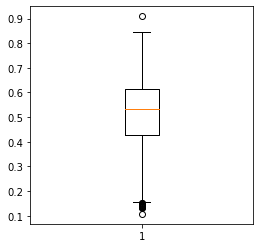

In [19]:
plt.figure(figsize=(4,4))
plt.boxplot(data_all['3rdvac'])

In [20]:
Q1 = np.percentile(data_all['3rdvac'], 25)
Q3 = np.percentile(data_all['3rdvac'], 75)
IQR = Q3 - Q1
outlier_step = 1.5 * IQR
data_outlier = data_all.loc[(data_all['3rdvac'] < Q1 - outlier_step)| (data_all['3rdvac'] > Q3 + outlier_step)]
print(data_outlier['MSOA name_x'])
index = data_all.loc[(data_all['3rdvac'] < Q1 - outlier_step)| (data_all['3rdvac'] > Q3 + outlier_step)].index
data_all.drop(index=index, axis=1, inplace=True)

1797                      Washwood Heath
1799    North Central & Dartmouth Circus
1800                        Saltley East
1807               Bordesley Green North
1827                     Sparkhill North
2077                       Waterloo Road
2130                          Girlington
2134                          Brown Royd
2135                      Barkerend East
2137            Shearbridge & University
2141                           Holme Top
2285                     Harehills North
2289                     Harehills South
5459              Burford & Brize Norton
6287                  Cathedral & Kelham
Name: MSOA name_x, dtype: object


## Single linear regression

In [21]:
x = ['Case number','Death case','13-20','21-30','31-45','46-60','60+','population',
     'life_expectancy','employment','income','poverty','enterprise','house_price']
single_result = pd.DataFrame()

In [22]:
for i in range(14):
    single_model = sm.OLS(endog=data_all[['3rdvac']], exog=sm.add_constant(data_all[[x[i]]])).fit()
    intercept = single_model.params[1]
    Rsquared = single_model.rsquared
    pvalue = single_model.f_pvalue
    fvalue = single_model.fvalue
    single = [[intercept,Rsquared,pvalue,fvalue]]
    #print(single)
    single_result = single_result.append(single)


/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [23]:
print(single_result)

              0         1              2             3
0 -4.429554e-03  0.044879   2.336320e-65    298.325046
0 -2.954413e-01  0.032929   3.781086e-48    216.183758
0 -2.060027e+00  0.170219  1.363700e-259   1302.414251
0 -1.286423e+00  0.362771   0.000000e+00   3614.447052
0 -1.889146e+00  0.409835   0.000000e+00   4409.017436
0  2.817907e+00  0.493795   0.000000e+00   6193.348183
0  1.302670e+00  0.735138   0.000000e+00  17622.009750
0 -1.973689e-05  0.108315  2.681320e-160    771.230524
0  1.830727e-02  0.181733  7.181778e-279   1410.078880
0  2.641774e-01  0.062656   2.476689e-91    424.396641
0  1.040925e-04  0.007781   1.895507e-12     49.787336
0 -1.145521e-02  0.630301   0.000000e+00  10824.416635
0 -5.245679e-01  0.091452  1.968099e-134    639.076236
0  2.184958e-07  0.023007   5.344138e-34    149.508066


## Multi regression

Text(0.5, 1.0, 'Correlation Matrix')

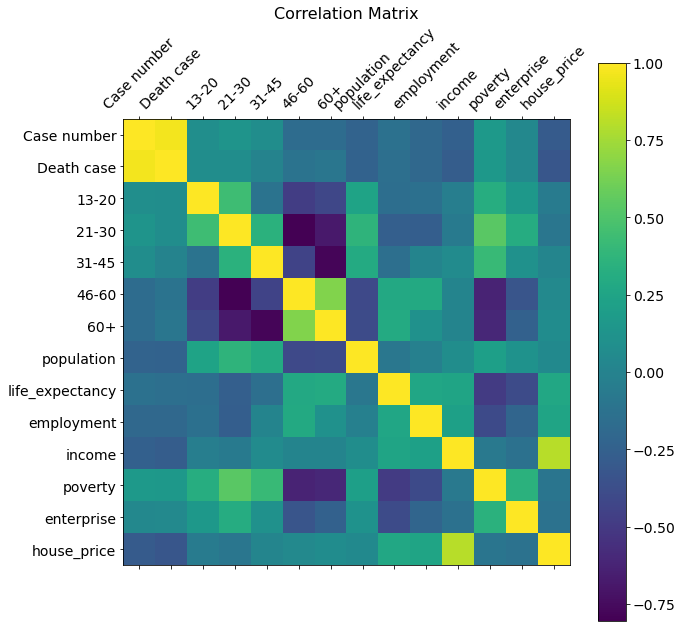

In [45]:
df = data_all.loc[:,('Case number','Death case','13-20','21-30','31-45','46-60','60+','population',
     'life_expectancy','employment','income','poverty','enterprise','house_price')]
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(10,10))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

In [32]:
data_X = data_all.loc[:,('Death case','21-30','60+','enterprise','house_price','poverty')]

In [33]:
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(data_X.values, i) for i in range(data_X.shape[1])]
vif_info['Column'] = data_X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
5,9.947519,poverty
1,7.946747,21-30
4,5.904809,house_price
2,5.501928,60+
3,3.853981,enterprise
0,2.520974,Death case


<AxesSubplot:title={'center':'x1: poverty'}, ylabel='Frequency'>

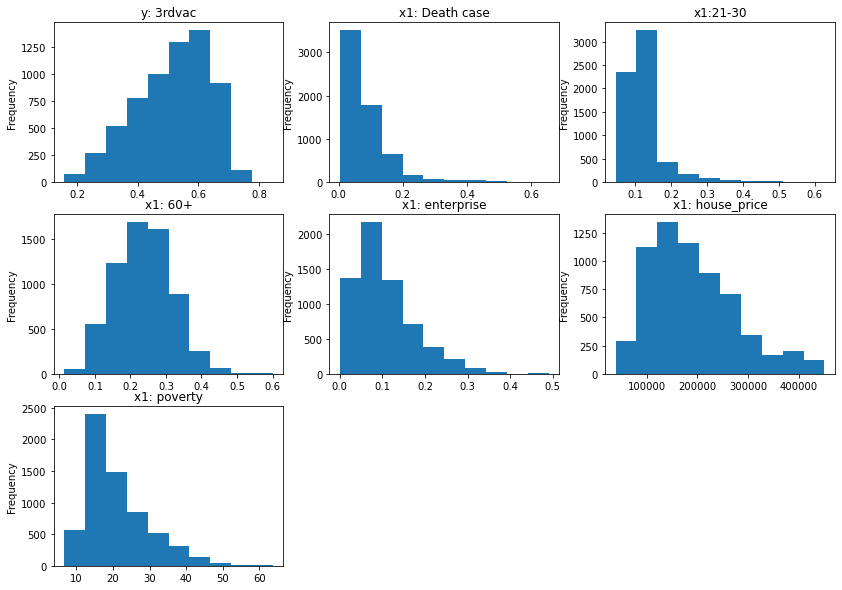

In [34]:
fig=plt.figure(figsize=(14,10))
ax1=fig.add_subplot(331)
data_all['3rdvac'].plot.hist(ax=ax1,title = 'y: 3rdvac')
ax2=fig.add_subplot(332)
data_all['Death case'].plot.hist(ax=ax2,title = 'x1: Death case')
ax3=fig.add_subplot(333)
data_all['21-30'].plot.hist(ax=ax3,title = 'x1:21-30')
ax4=fig.add_subplot(334)
data_all['60+'].plot.hist(ax=ax4,title = 'x1: 60+')
ax5=fig.add_subplot(335)
data_all['enterprise'].plot.hist(ax=ax5,title = 'x1: enterprise')
ax6=fig.add_subplot(336)
data_all['house_price'].plot.hist(ax=ax6,title = 'x1: house_price')
ax7=fig.add_subplot(337)
data_all['poverty'].plot.hist(ax=ax7,title = 'x1: poverty')

In [35]:
#data_X['Death case']=np.log(data_X['Death case']+0.0000000001)
#data_X['21-30']=np.log(data_X['21-30']+0.0000000001)
#data_X['60+']=np.log(data_X['60+'])
#data_X['enterprise']=np.log(data_X['enterprise']+0.0000000001)
#data_X['house_price']=np.log(data_X['house_price']+0.0000000001)
#data_X['poverty']=np.log(data_X['poverty']+0.0000000001)

## Split train and test

In [36]:
from sklearn.model_selection import train_test_split

data_train,data_test = train_test_split(data_all,test_size = 0.2,random_state = 42)
print(len(data_train),len(data_test))

5080 1271


In [37]:
model = sm.OLS(endog=data_train[['3rdvac']], 
               exog=sm.add_constant(data_train[['Death case','21-30','60+','enterprise','house_price','poverty']])).fit()
model.summary()

/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 3rdvac   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     5324.
Date:                Mon, 17 Jan 2022   Prob (F-statistic):               0.00
Time:                        17:58:05   Log-Likelihood:                 8521.5
No. Observations:                5080   AIC:                        -1.703e+04
Df Residuals:                    5073   BIC:                        -1.698e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3900      0.005     73.329      0.000       0.380       0.400
Death case     -0.0585      0.009     -6.569      0.000      -0.076      -0.041
21-30           0.1518      0.015      9.846      0.000       0.122       0.182
60+             0.9634      0.012     82.736      0.000       0.941       0.986
enterprise     -0.0237      0.010     -2.440      0.015      -0.043      -0.005
house_price  7.859e-08   7.98e-09      9.848      0.000    6.29e-08    9.42e-08
poverty        -0.0062   9.95e-05    -62.551      0.000      -0.006      -0.006
==============================================================================
Omnibus:                       70.302   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.420
Skew:                           0.071   Prob(JB):                     1.58e-27
Kurtosis:                       3.750   Cond. No.                     5.79e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.79e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:ylabel='Frequency'>

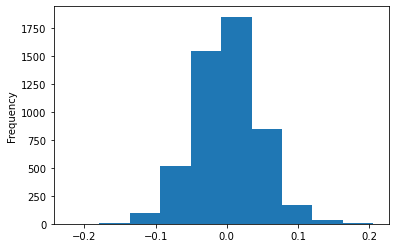

In [38]:
model.resid.plot.hist()

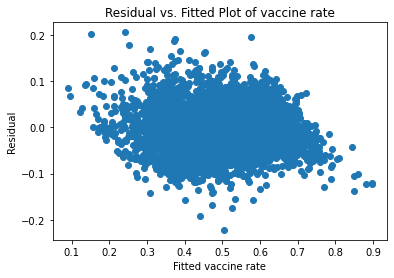

In [46]:
# plot 
plt.scatter(model.fittedvalues, model.resid)
# adding title and labels
plt.xlabel('Fitted vaccine rate')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of vaccine rate')
plt.show()

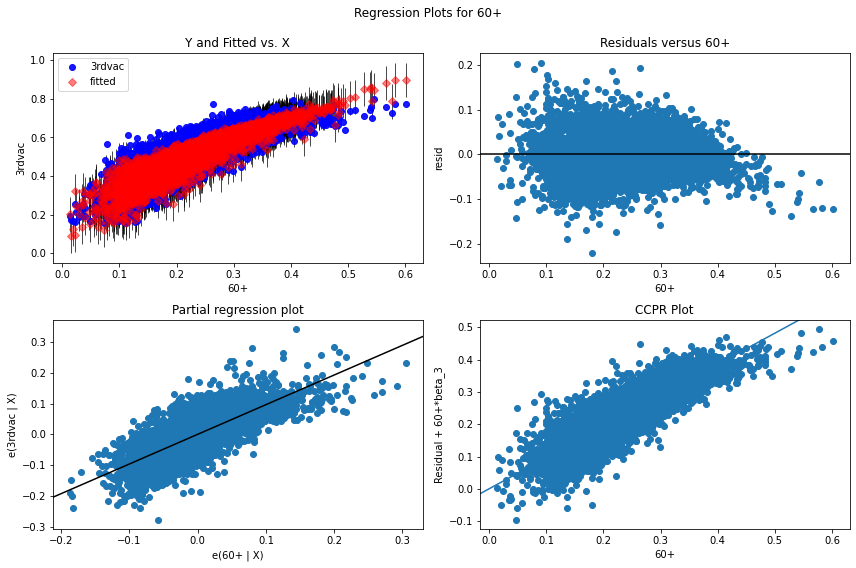

In [47]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, '60+', fig=fig)

In [41]:
pred = model.predict(sm.add_constant(data_test[['Death case','21-30','60+','enterprise','house_price','poverty']]))
error = data_test['3rdvac'] - pred
error.describe()

/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


count    1271.000000
mean        0.002114
std         0.045021
min        -0.145450
25%        -0.025974
50%         0.001969
75%         0.029069
max         0.279245
dtype: float64

In [42]:
(error*error).sum()/1271

0.0020297693142231417